# Data Assessment

#### Group 2

## Project Title - Analysis of human drug products approved for use be Health Canada

The data has been taken from the official website of Health Canada - [Drug Product Database](https://www.canada.ca/en/health-canada/services/drugs-health-products/drug-products/drug-product-database/what-data-extract-drug-product-database.html)

The data we are using for our analysis consists of 4 zipped files - approved, marketed, canceled, and dormant. Each zipped file contains products for human, veterinary, disinfectant, and radiopharmaceutical use. Moreover, each zipped file contains around 12 text files(CSV files) which represent the actual tables. Now, to analyze the whole data and the relationship between them, It is necessary to store the files in a common platform. For this, we performed the following operations:
- Extracted the files and stored them in a common folder
- Concatenate similar files from different categories
- stored the merged file in a common folder(this is our final folder)

Note:- After looking at the data closely, we identified that some of the tables are not important so, we excluded 4 tables and we are keeping 8 tables in our analysis. important datasets and performed the above operations on selected files only. Also, we are doing our analysis on human-related drugs. So later, we will filter our datasets for the human class only.

In [5]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil

In [6]:
# Load drug
drug = pd.read_csv("DPD_Combined_Files/drug.csv")

## Data Exploration:

In [7]:
drug.head()

,DRUG_CODE,PRODUCT_CATEGORIZATION,CLASS,DRUG_IDENTIFICATION_NUMBER,BRAND_NAME,DESCRIPTOR,PEDIATRIC_FLAG,ACCESSION_NUMBER,NUMBER_OF_AIS,LAST_UPDATE_DATE,AI_GROUP_NO,CLASS_FFootnote *,BRAND_NAME_FFootnote *,DESCRIPTOR_FFootnote *
0,10000,NaN,Veterinary,813761,LINCOMIX,NaN,N,69580,1,03-DEC-2018,105826008,Vétérinaire,NaN,NaN
1,100000,CAT IV - SUNBURN PROTECTANTS,Human,2510804,COOLA CLASSIC FACE SPF 50 SUNSCREEN LOTION FRA...,NaN,N,NaN,4,22-JUL-2021,451521100,Humain,NaN,NaN
2,100001,CAT IV - SUNBURN PROTECTANTS,Human,2510812,COOLA CLASSIC FACE SPF 50 SUNSCREEN LOTION WHI...,NaN,N,NaN,4,22-JUL-2021,451521100,Humain,NaN,NaN
3,100002,NaN,Human,2510839,VYEPTI,SINGLE USE VIAL,N,NaN,1,23-AUG-2022,162703001,Humain,NaN,FIOLE À USAGE UNIQUE
4,100004,NaN,Human,2510847,VAXZEVRIA,VIAL CONTAINS 10 DOSES OF 0.5ML,N,NaN,1,18-MAY-2022,162722001,Humain,NaN,"FIOLE CONTIENT 10 DOSES DE 0,5 ML"


In [8]:
test_col =  ['DRUG_CODE', 'PRODUCT_CATEGORIZATION', 'CLASS', 'DRUG_IDENTIFICATION_NUMBER', 'BRAND_NAME', 'DESCRIPTOR', 'PEDIATRIC_FLAG', 'ACCESSION_NUMBER', 'NUMBER_OF_AIS', 'LAST_UPDATE_DATE', 'AI_GROUP_NO', 'CLASS_FFootnote *', 'BRAND_NAME_FFootnote *', 'DESCRIPTOR_FFootnote *']


In [9]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55004 entries, 0 to 55003
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   DRUG_CODE                   55004 non-null  int64 
 1   PRODUCT_CATEGORIZATION      7891 non-null   object
 2   CLASS                       55004 non-null  object
 3   DRUG_IDENTIFICATION_NUMBER  55004 non-null  object
 4   BRAND_NAME                  55004 non-null  object
 5   DESCRIPTOR                  2954 non-null   object
 6   PEDIATRIC_FLAG              55004 non-null  object
 7   ACCESSION_NUMBER            21134 non-null  object
 8   NUMBER_OF_AIS               55004 non-null  int64 
 9   LAST_UPDATE_DATE            55004 non-null  object
 10  AI_GROUP_NO                 55004 non-null  int64 
 11  CLASS_FFootnote *           55004 non-null  object
 12  BRAND_NAME_FFootnote *      1482 non-null   object
 13  DESCRIPTOR_FFootnote *      794 non-null    ob

In [10]:
drug.isna().sum()

DRUG_CODE                         0
PRODUCT_CATEGORIZATION        47113
CLASS                             0
DRUG_IDENTIFICATION_NUMBER        0
BRAND_NAME                        0
DESCRIPTOR                    52050
PEDIATRIC_FLAG                    0
ACCESSION_NUMBER              33870
NUMBER_OF_AIS                     0
LAST_UPDATE_DATE                  0
AI_GROUP_NO                       0
CLASS_FFootnote *                 0
BRAND_NAME_FFootnote *        53522
DESCRIPTOR_FFootnote *        54210
dtype: int64

In [13]:
# Load drug
ingred = pd.read_csv("DPD_Combined_Files/ingred.csv")

In [14]:
ingred.head()

,DRUG_CODE,ACTIVE_INGREDIENT_CODE,INGREDIENT,INGREDIENT_SUPPLIED_IND,STRENGTH,STRENGTH_UNIT,STRENGTH_TYPE,DOSAGE_VALUE,BASE,DOSAGE_UNIT,NOTES,INGREDIENT_FFootnote*,STRENGTH_UNIT_FFootnote*,STRENGTH_TYPE_FFootnote*,DOSAGE_UNIT_FFootnote*
0,42652,150,ACETYLSALICYLIC ACID,I,325.0,MG,NaN,NaN,N,EVT,HISTORIC FREEFORM TEXT: ACETYLSALICYLIC ACID Q...,Acide acétylsalicylique,MG,NaN,NaN
1,43063,424,AZITHROMYCIN,I,250.0,MG,NaN,NaN,N,NaN,HISTORIC FREEFORM TEXT: AZITHROMYCIN ((AZITHRO...,Azithromycine,MG,NaN,NaN
2,43041,11085,DOBUTAMINE (DOBUTAMINE HYDROCHLORIDE),I,250.0,MG,NaN,20.0,N,ML,HISTORIC FREEFORM TEXT: DOBUTAMINE ((AS DOBUTA...,Dobutamine (Chlorhydrate de dobutamine),MG,NaN,ML
3,46832,16202,RABIES VACCINE INACTIVATED (HUMAN DIPLOID-CELL...,I,2.5,UNIT,NaN,NaN,N,VIAL,HISTORIC FREEFORM TEXT: RABIES VACCINE DRIED H...,Vaccin antirabique inactivé (cultivé sur cellu...,Unité,NaN,Fiole
4,44090,1241,KETOROLAC TROMETHAMINE,I,10.0,MG,NaN,NaN,N,ML,Historic Freeform Text: KETOROLAC TROMETHAMINE,Kétorolac trométhamine,MG,NaN,ML


In [15]:
ingred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116025 entries, 0 to 116024
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DRUG_CODE                 116025 non-null  int64  
 1   ACTIVE_INGREDIENT_CODE    116025 non-null  int64  
 2   INGREDIENT                116025 non-null  object 
 3   INGREDIENT_SUPPLIED_IND   116025 non-null  object 
 4   STRENGTH                  115865 non-null  float64
 5   STRENGTH_UNIT             116025 non-null  object 
 6   STRENGTH_TYPE             0 non-null       float64
 7   DOSAGE_VALUE              11319 non-null   float64
 8   BASE                      116025 non-null  object 
 9   DOSAGE_UNIT               63461 non-null   object 
 10  NOTES                     63006 non-null   object 
 11  INGREDIENT_FFootnote*     115936 non-null  object 
 12  STRENGTH_UNIT_FFootnote*  116025 non-null  object 
 13  STRENGTH_TYPE_FFootnote*  0 non-null       f

In [16]:
ingred.isna().sum()

DRUG_CODE                        0
ACTIVE_INGREDIENT_CODE           0
INGREDIENT                       0
INGREDIENT_SUPPLIED_IND          0
STRENGTH                       160
STRENGTH_UNIT                    0
STRENGTH_TYPE               116025
DOSAGE_VALUE                104706
BASE                             0
DOSAGE_UNIT                  52564
NOTES                        53019
INGREDIENT_FFootnote*           89
STRENGTH_UNIT_FFootnote*         0
STRENGTH_TYPE_FFootnote*    116025
DOSAGE_UNIT_FFootnote*       52842
dtype: int64

In [19]:
# Load drug
company= pd.read_csv("DPD_Combined_Files/company.csv")

In [20]:
company.head()

,DRUG_CODE,MFR_CODE,COMPANY_CODE,COMPANY_NAME,COMPANY_TYPE,ADDRESS_MAILING_FLAG,ADDRESS_BILLING_FLAG,ADDRESS_NOTIFICATION_FLAG,ADDRESS_OTHER,SUITE_NUMBER,STREET_NAME,CITY_NAME,PROVINCE,COUNTRY,POSTAL_CODE,POST_OFFICE_BOX,PROVINCE_FFootnote*,COUNTRY_FFootnote*
0,30557,ATL07,3659,LABORATOIRE ATLAS INC,DIN OWNER,Y,Y,Y,N,NaN,9600 BOUL. DES SCIENCES,MONTREAL,QUEBEC,CANADA,H1J 3B6,NaN,QUÉBEC,CANADA
1,28306,SOC07,5166,GROUPE SAVON OLYMPIC INC.,DIN OWNER,Y,Y,Y,N,NaN,2700 BOUL. DANIEL-JOHNSON,LAVAL,QUEBEC,CANADA,H7P 5Z7,NaN,QUÉBEC,CANADA
2,26307,GCC08,4231,GERMIPHENE CORPORATION,DIN OWNER,Y,Y,Y,N,NaN,1379 COLBORNE STREET EAST,BRANTFORD,ONTARIO,CANADA,N3T 5M1,NaN,ONTARIO,CANADA
3,62499,SRO08,5181,"EMD SERONO, A DIVISION OF EMD INC., CANADA",DIN OWNER,Y,Y,Y,N,NaN,"2695 NORTH SHERIDAN WAY, SUITE 200",MISSISSAUGA,ONTARIO,CANADA,L5K 2N6,NaN,ONTARIO,CANADA
4,38055,ODN07,4835,ODAN LABORATORIES LTD,DIN OWNER,Y,Y,Y,N,NaN,325 STILLVIEW AVENUE,POINTE-CLAIRE,QUEBEC,CANADA,H9R 2Y6,NaN,QUÉBEC,CANADA


In [21]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55004 entries, 0 to 55003
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DRUG_CODE                  55004 non-null  int64 
 1   MFR_CODE                   32011 non-null  object
 2   COMPANY_CODE               55004 non-null  int64 
 3   COMPANY_NAME               55004 non-null  object
 4   COMPANY_TYPE               55004 non-null  object
 5   ADDRESS_MAILING_FLAG       55004 non-null  object
 6   ADDRESS_BILLING_FLAG       55004 non-null  object
 7   ADDRESS_NOTIFICATION_FLAG  55004 non-null  object
 8   ADDRESS_OTHER              35573 non-null  object
 9   SUITE_NUMBER               9620 non-null   object
 10  STREET_NAME                54902 non-null  object
 11  CITY_NAME                  55004 non-null  object
 12  PROVINCE                   55002 non-null  object
 13  COUNTRY                    55004 non-null  object
 14  POSTAL

In [22]:
company.isna().sum()

DRUG_CODE                        0
MFR_CODE                     22993
COMPANY_CODE                     0
COMPANY_NAME                     0
COMPANY_TYPE                     0
ADDRESS_MAILING_FLAG             0
ADDRESS_BILLING_FLAG             0
ADDRESS_NOTIFICATION_FLAG        0
ADDRESS_OTHER                19431
SUITE_NUMBER                 45384
STREET_NAME                    102
CITY_NAME                        0
PROVINCE                         2
COUNTRY                          0
POSTAL_CODE                     35
POST_OFFICE_BOX              53236
PROVINCE_FFootnote*           1482
COUNTRY_FFootnote*               0
dtype: int64

In [24]:
# Load drug
status= pd.read_csv("DPD_Combined_Files/status.csv")

In [25]:
status.head()

,DRUG_CODE,CURRENT_STATUS_FLAG,STATUS,HISTORY_DATE,STATUS_FFootnote*,LOT_NUMBERFootnote*,EXPIRATION_DATEFootnote*
0,10000,N,APPROVED,02-MAR-2004,APPROUVÉ,NaN,NaN
1,10000,N,APPROVED,08-FEB-2018,APPROUVÉ,NaN,NaN
2,10000,N,APPROVED,15-MAY-1997,APPROUVÉ,NaN,NaN
3,10000,N,APPROVED,24-FEB-2004,APPROUVÉ,NaN,NaN
4,10000,N,APPROVED,27-JAN-2014,APPROUVÉ,NaN,NaN


In [26]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159499 entries, 0 to 159498
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DRUG_CODE                 159499 non-null  int64 
 1   CURRENT_STATUS_FLAG       159499 non-null  object
 2   STATUS                    159499 non-null  object
 3   HISTORY_DATE              159499 non-null  object
 4   STATUS_FFootnote*         159499 non-null  object
 5   LOT_NUMBERFootnote*       4312 non-null    object
 6   EXPIRATION_DATEFootnote*  4295 non-null    object
dtypes: int64(1), object(6)
memory usage: 8.5+ MB


In [27]:
status.isna().sum()

DRUG_CODE                        0
CURRENT_STATUS_FLAG              0
STATUS                           0
HISTORY_DATE                     0
STATUS_FFootnote*                0
LOT_NUMBERFootnote*         155187
EXPIRATION_DATEFootnote*    155204
dtype: int64

In [29]:
# Load drug
form= pd.read_csv("DPD_Combined_Files/form.csv")

In [30]:
form.head()

,DRUG_CODE,PHARM_FORM_CODE,PHARMACEUTICAL_FORM,PHARMACEUTICAL_FORM_FFootnote*
0,10000,56,POWDER FOR SOLUTION,Poudre pour solution
1,100000,36,LOTION,Lotion
2,100001,36,LOTION,Lotion
3,100002,134,SOLUTION,Solution
4,100004,134,SOLUTION,Solution


In [31]:
form.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59410 entries, 0 to 59409
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DRUG_CODE                       59410 non-null  int64 
 1   PHARM_FORM_CODE                 59410 non-null  int64 
 2   PHARMACEUTICAL_FORM             59410 non-null  object
 3   PHARMACEUTICAL_FORM_FFootnote*  59382 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


In [32]:
form.isna().sum()

DRUG_CODE                          0
PHARM_FORM_CODE                    0
PHARMACEUTICAL_FORM                0
PHARMACEUTICAL_FORM_FFootnote*    28
dtype: int64

In [34]:
# Load drug
schedule= pd.read_csv("DPD_Combined_Files/schedule.csv")

In [35]:
schedule.head()

,DRUG_CODE,SCHEDULE,SCHEDULE_FFootnote*
0,10000,Prescription,Prescription
1,100000,OTC,En vente libre
2,100001,OTC,En vente libre
3,100002,Prescription,Prescription
4,100002,Schedule D,Annexe D


In [36]:
schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55337 entries, 0 to 55336
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DRUG_CODE            55337 non-null  int64 
 1   SCHEDULE             55337 non-null  object
 2   SCHEDULE_FFootnote*  55337 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [37]:
schedule.isna().sum()

DRUG_CODE              0
SCHEDULE               0
SCHEDULE_FFootnote*    0
dtype: int64

In [39]:
# Load drug
ther= pd.read_csv("DPD_Combined_Files/ther.csv")

In [40]:
ther.head()

,DRUG_CODE,TC_ATC_NUMBER,TC_ATC,TC_AHFS_NUMBER
0,9239,M01AB02,SULINDAC,NaN
1,9240,C03CA01,FUROSEMIDE,NaN
2,9241,M01AE02,NAPROXEN,NaN
3,9269,D07AC01,BETAMETHASONE,NaN
4,9270,D07AC01,BETAMETHASONE,NaN


In [41]:
ther.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53954 entries, 0 to 53953
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DRUG_CODE       53954 non-null  int64  
 1   TC_ATC_NUMBER   47416 non-null  object 
 2   TC_ATC          47416 non-null  object 
 3   TC_AHFS_NUMBER  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [42]:
ther.isna().sum()

DRUG_CODE             0
TC_ATC_NUMBER      6538
TC_ATC             6538
TC_AHFS_NUMBER    53954
dtype: int64

In [44]:
# Load drug
route= pd.read_csv("DPD_Combined_Files/route.csv")

In [45]:
route.head()

,DRUG_CODE,ROUTE_OF_ADMINISTRATION_CODE,ROUTE_OF_ADMINISTRATION,ROUTE_OF_ADMINISTRATION_FFootnote*
0,10000,56,ORAL,Orale
1,100000,70,TOPICAL,Topique
2,100001,70,TOPICAL,Topique
3,100002,49,INTRAVENOUS,Intraveineuse
4,100004,22,INTRAMUSCULAR,Intramusculaire


In [46]:
route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63173 entries, 0 to 63172
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   DRUG_CODE                           63173 non-null  int64 
 1   ROUTE_OF_ADMINISTRATION_CODE        63173 non-null  int64 
 2   ROUTE_OF_ADMINISTRATION             63173 non-null  object
 3   ROUTE_OF_ADMINISTRATION_FFootnote*  63167 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [47]:
route.isna().sum()

DRUG_CODE                             0
ROUTE_OF_ADMINISTRATION_CODE          0
ROUTE_OF_ADMINISTRATION               0
ROUTE_OF_ADMINISTRATION_FFootnote*    6
dtype: int64

### Assessment for Data Quality:

**drug** - The dataset contains 14 features and 54822 records. 3 features are integral and most of the features are categorical. Also, the 5 features of the dataset contain a huge number of null values. these null values have to be taken care during the data transformation process.

**ingred** - The dataset contains 15 features and 115753 records. 6 features are integer type, other 9 features are object type(string). Here also, some features of the dataset contain null valiues.

**company** - The dataset contains 54822 rows and 18 columns. Some coulmns contain null values. 

**status** - The dataset has 158922 rows and 7 columns. Except for two columns, the data seems clean.

**form** - With 59223 records and 4 columns, this dataset contains very few null values in one column, which can be easily taken care of during data cleaning process. 

**schedule** - The dataset contains 55150 rows and 3 fields. Cleaning is not required here as this dataset has no null values.

**ther** - This dataset with 53763 rows and 4 columns, requires a to pay attention as a lot of values are null in this dataset.

**route** - The dataset contains 62920 rows and 4 columns. This dataset has no null values.

While checking the quality of the data, understanding the data without column names was a big challenge for us. We explicitly added the column names for each table.

Another issue was deciding the common folder for data like how we should extract, merge/combine the data, and where to store it so that we can proceed to our next step easily which will be data cleaning and transformation. 

Looking at the variables of the datasets, Some of the columns are hard to understand. Getting information about the features is a big challenge for our team.
Overall, the quality of data requires some improvement. We need to clean the data and handle the null values, especially the columns where almost 90% of the values are not available. We also need to identify and handle the values which are not relevant. The data also need some transformation and pre-processing. 

### Assessment for Data Fitness:

Looking at the variables and the values of the data, the data contains enough information to answer our analytical questions. We need to perform cleaning and transformation, before proceeding to find analytical insights. we may also need to create categories, groups, measures, and calculated columns to answer some of the questions. but overall w find that the fitness of the data is good enough to perform visualization.  

Additionally, by observing the data, we found that drug is a fact table here and other tables are dimension tables. All the tables are related to the drug table by the drug_code column. By using this information, we can create aggregations on the drug table based on various other features on the dimension table. We can also Crate a hierarchy by using the country, province, and city features. The date field can also be used as a hierarchy. 

### Ethical Assessment:

**Consent: Do we have proper consent and what are the consequences?** 

According to government of Canada, the information use is allow and free to copy, modify, publish, translate, adapt, distribute or otherwise use the Information in any medium, mode or format for any lawful purpose. There are some restrictions and exemptions which can be found [here](https://open.canada.ca/en/open-government-licence-canada). We have followed all these rules and policy and alos taken care of all the restrictions.

For this project proposes, the objective is not to alter the data or use personal data or data of companies related to the research. 

**Clarity: Are we clear on how the data will be used?**

We are using the information for analysis and visualization proposes, and all data relationship and all fields descriptions has been analyzed and supported by the source.

All terminologies and data dictionary is supported by the [source](https://www.canada.ca/en/health-canada/services/drugs-health-products/drug-products/drug-product-database/terminology.html ) 

All tables relationship is given by the drug_code for all tables, and structure is given by the [source](https://www.canada.ca/en/health-canada/services/drugs-health-products/drug-products/drug-product-database/read-file-drug-product-database-data-extract.html)
 

**Consistency: Do we have safeguards in protecting user data?**

The team project understands the importance of drug information and the consequences in case of misuse of information. All information will be used for project purposes only and won’t become as open data for public access. 
 

**Control: Who controls the data and what if the user requests their data to be removed?**

All databases and sources will be controlled by team members only. Won’t be granted any permission to external individuals or organizations. 


**Consequences: Could the data cause anyone harm in how it’s used?**

The misuse of the information could cause unwanted damage if they are not supervised by qualified personnel. For project purposes, all the information will not share with any externals in any circumstances. 


## Exploratory data Analysis:

<AxesSubplot:xlabel='CLASS', ylabel='count'>

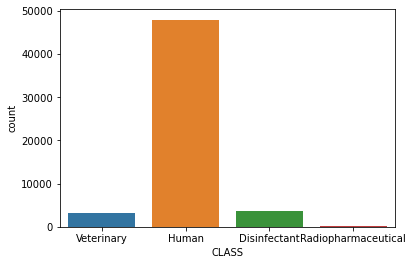

In [48]:
sns.countplot(x=drug['CLASS'])

The above chart represents the total number of drugs used in each categories. 
In our finak visualization, we will present detailed analysis of human related drug.

<AxesSubplot:xlabel='count', ylabel='STATUS'>

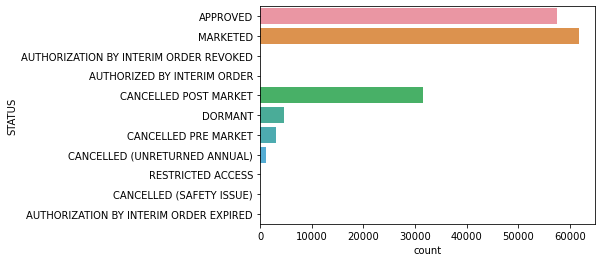

In [49]:
sns.countplot(y=status['STATUS'])

The abov echarts shows the distribution of total number of drugs with their respective status in the market. 
We will be analysing various factors related to these status and present some insights on those factors.

<AxesSubplot:xlabel='count', ylabel='SCHEDULE'>

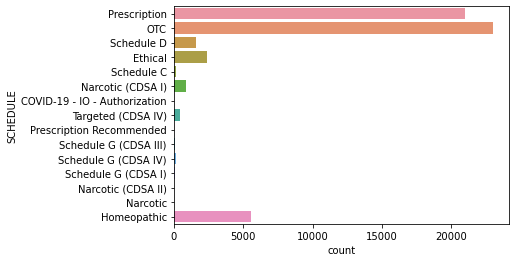

In [50]:
sns.countplot(y=schedule['SCHEDULE'])

The above chart represents the number of drugs with assigned schedule(Each drug is assigned one or more of the schedules, according to the Food and Drug Regulations, and the Controlled Drugs and Substances Act.)

### Challenges:

1. Storage of data - Since the data was available on the Health Canada website. We had been suggested to store the data in a relational database system. Since the data source is a flat file system, It was a complex task to achieve with extra effort and time. To reduce the complexity of the project, we decided to load the data in a folder structure.

2. Column mapping - The data source files only contained data and no header information. We had to rely on the information provided on the Health Canada website. We hardcoded the columns during the data exploration process.

3. Selection of tables and merging the files - Since there were around 49 files, we had multiple rounds of discussions within the team to finalize the tables which we require for our project. Merging the related tables was also a challenging task.

